In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = 'data/sensor_metrics.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,date,field,value,device_id
0,0,2022-05-23 05:21:20.242008+00:00,battery_voltage,14.99837,SB1001
1,1,2022-05-23 05:21:51.183225+00:00,battery_voltage,14.99837,SB1001
2,2,2022-05-23 05:22:22.381353+00:00,battery_voltage,14.99837,SB1001
3,3,2022-05-23 05:22:52.605236+00:00,battery_voltage,14.99837,SB1001
4,4,2022-05-23 05:23:22.870146+00:00,battery_voltage,14.99837,SB1001


In [3]:
# showing values in 'field'
df['field'].value_counts()

battery_voltage    136464
data_balance       136464
db_level           136464
last_recorded      136464
last_uploaded      136464
panel_voltage      136464
signal_strength    136464
Name: field, dtype: int64

In [4]:
# 'count' portraying exact number of values within 'field'
df['field'].describe()

count              955248
unique                  7
top       battery_voltage
freq               136464
Name: field, dtype: object

In [5]:
df.field.unique()

array(['battery_voltage', 'data_balance', 'db_level', 'last_recorded',
       'last_uploaded', 'panel_voltage', 'signal_strength'], dtype=object)

In [6]:
# filtering out other values except for 'db_level_
df_field_data = ['db_level']
new_df = df[df.field.isin(df_field_data)]
new_df.head()

,Unnamed: 0,date,field,value,device_id
272928,272928,2022-05-23 05:21:20.257379+00:00,db_level,80.15035,SB1001
272929,272929,2022-05-23 05:21:51.194415+00:00,db_level,70.13739,SB1001
272930,272930,2022-05-23 05:22:22.392657+00:00,db_level,102.26990,SB1001
272931,272931,2022-05-23 05:22:52.616672+00:00,db_level,78.22692,SB1001
272932,272932,2022-05-23 05:23:22.881239+00:00,db_level,65.71063,SB1001


In [7]:
new_df.head()

,Unnamed: 0,date,field,value,device_id
272928,272928,2022-05-23 05:21:20.257379+00:00,db_level,80.15035,SB1001
272929,272929,2022-05-23 05:21:51.194415+00:00,db_level,70.13739,SB1001
272930,272930,2022-05-23 05:22:22.392657+00:00,db_level,102.26990,SB1001
272931,272931,2022-05-23 05:22:52.616672+00:00,db_level,78.22692,SB1001
272932,272932,2022-05-23 05:23:22.881239+00:00,db_level,65.71063,SB1001


In [8]:
df[df["field"]=="db_level"]

,Unnamed: 0,date,field,value,device_id
272928,272928,2022-05-23 05:21:20.257379+00:00,db_level,80.15035,SB1001
272929,272929,2022-05-23 05:21:51.194415+00:00,db_level,70.13739,SB1001
272930,272930,2022-05-23 05:22:22.392657+00:00,db_level,102.26990,SB1001
272931,272931,2022-05-23 05:22:52.616672+00:00,db_level,78.22692,SB1001
272932,272932,2022-05-23 05:23:22.881239+00:00,db_level,65.71063,SB1001
...,...,...,...,...,...
409387,409387,2022-05-26 22:27:31.855684+00:00,db_level,79.60939,SB1013
409388,409388,2022-05-26 22:28:02.936844+00:00,db_level,54.64372,SB1013
409389,409389,2022-05-26 22:30:59.937044+00:00,db_level,0.00000,SB1013
409390,409390,2022-05-26 22:31:30.896429+00:00,db_level,0.00000,SB1013


In [9]:
sensor_df = new_df['device_id'].value_counts()
print(sensor_df)

SB1007    88566
SB1005    18242
SB1012    14821
SB1001     7768
SB1006     3794
SB1002     2542
SB1013      686
SB1008       45
Name: device_id, dtype: int64


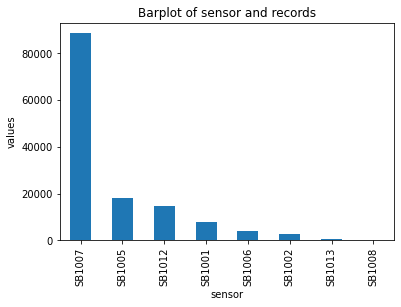

In [10]:
fig,ax = plt.subplots()
sensor_df.plot(ax = ax, kind = 'bar', ylabel = 'values',xlabel='sensor')
plt.title('Barplot of sensor and records')
plt.show()

Text(0.5, 1.0, 'Line plot')

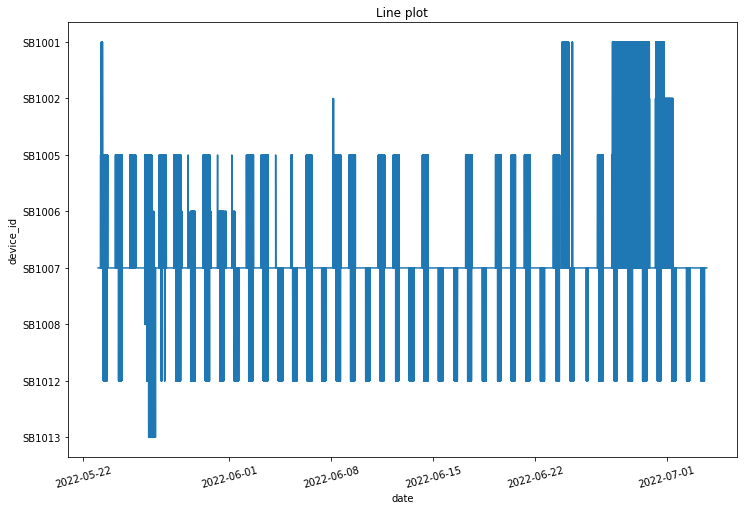

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='date', y='device_id')
plt.xticks(rotation=15)
plt.title('Line plot')

<AxesSubplot:xlabel='date', ylabel='value'>

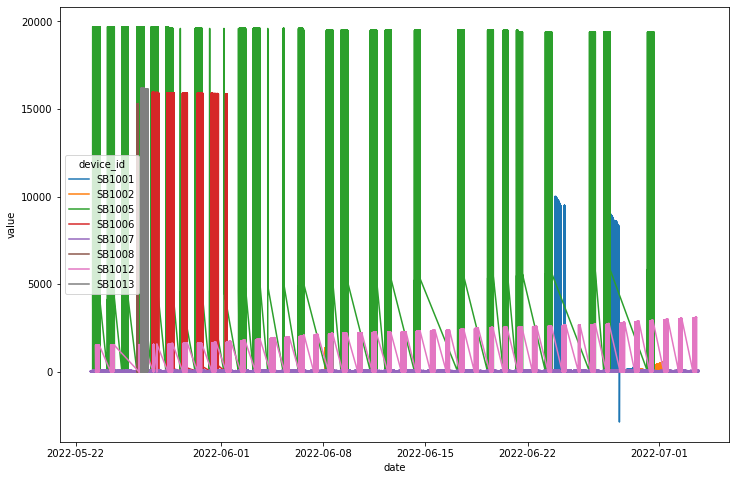

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="date", y="value", hue="device_id")

In [16]:
# converting date-object to datetime
df['date'] = pd.to_datetime(df['date'])
df['date']

0        2022-05-23 05:21:20.242008+00:00
1        2022-05-23 05:21:51.183225+00:00
2        2022-05-23 05:22:22.381353+00:00
3        2022-05-23 05:22:52.605236+00:00
4        2022-05-23 05:23:22.870146+00:00
                       ...               
955243   2022-05-26 22:27:31.852231+00:00
955244   2022-05-26 22:28:02.933391+00:00
955245   2022-05-26 22:30:59.933363+00:00
955246   2022-05-26 22:31:30.892709+00:00
955247   2022-05-26 22:32:01.219158+00:00
Name: date, Length: 955248, dtype: datetime64[ns, UTC]

In [60]:
df1 = pd.date_range('2022-05-23', periods=6, freq='1D20min')
df2 = pd.DataFrame({'df': [1, 2, 3, 4, 5, 6, 7, 8]}, index=i)
df2

,df
2022-05-23,1
2022-05-24,2
2022-05-25,3
2022-05-26,4
2022-05-27,5
2022-05-28,6
2022-05-29,7
2022-05-30,8


In [55]:
df2.between_time(start_time='10:00:00', end_time='6:00:00')
print(df2)

            df
2022-05-23   1
2022-05-24   2
2022-05-25   3
2022-05-26   4
2022-05-27   5
2022-05-28   6
2022-05-29   7
2022-05-30   8


In [56]:
df2.between_time(start_time='22:00:00', end_time='6:00:00')
print(df2)

            df
2022-05-23   1
2022-05-24   2
2022-05-25   3
2022-05-26   4
2022-05-27   5
2022-05-28   6
2022-05-29   7
2022-05-30   8
